In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving advertising.csv to advertising.csv


{'advertising.csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27.7,1.8,20

In [ ]:
data = pd.read_csv('advertising.csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


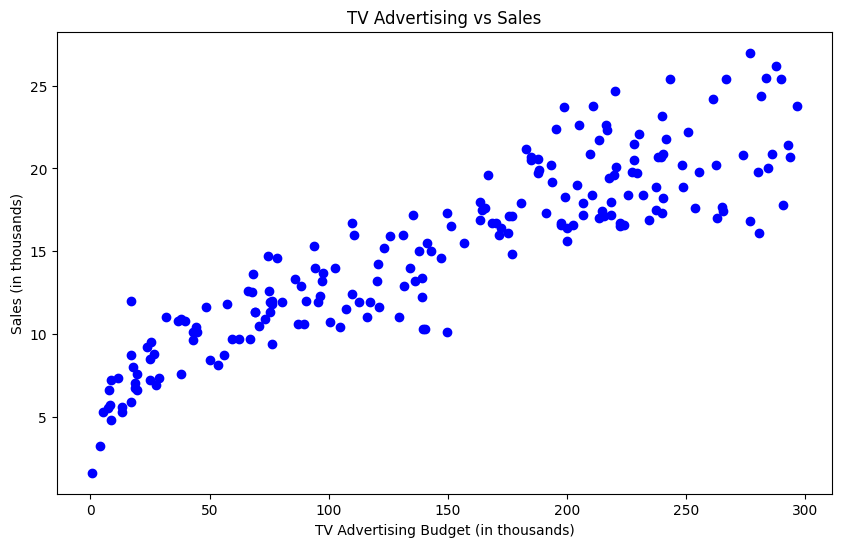

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['TV'], data['Sales'], color='blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()


In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)
y = data['Sales']  # Dependent variable (Sales)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           8.13e-99
Time:                        07:34:59   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [ ]:
new_data = pd.DataFrame({'TV': [1000], 'Radio': [0], 'Newspaper': [0]})
new_data = sm.add_constant(new_data)

const_col_name = new_data.columns[0]

new_data = new_data[[const_col_name, 'TV', 'Radio', 'Newspaper']]

In [ ]:
predicted_sales = model.predict(new_data)

In [ ]:
print(f"Predicted Sales for TV advertising budget of 1000 units: {predicted_sales[0]:.2f} thousand")

Predicted Sales for TV advertising budget of 1000 units: 4679.57 thousand


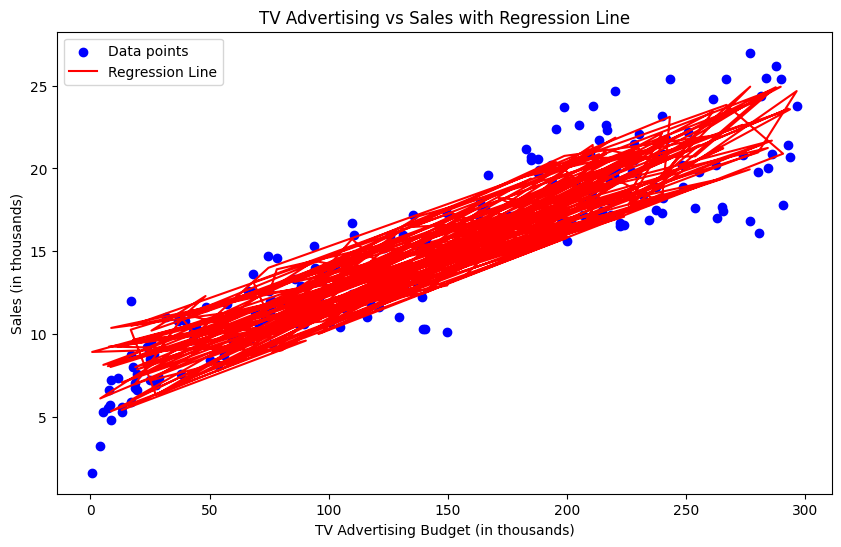

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['TV'], data['Sales'], color='blue', label='Data points')
plt.plot(data['TV'], model.predict(X), color='red', label='Regression Line')
plt.title('TV Advertising vs Sales with Regression Line')
plt.xlabel('TV Advertising Budget (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.legend()
plt.show()